<a href="https://colab.research.google.com/github/sudiksha10-09/ML-Project-/blob/main/DSProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("oktayrdeki/traffic-accidents")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'traffic-accidents' dataset.
Path to dataset files: /kaggle/input/traffic-accidents


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
files = os.listdir(path)
print("Files in folder:", files)
csv_file = [f for f in files if f.endswith(".csv")][0]
csv_path = os.path.join(path, csv_file)
print("Using dataset file:", csv_path)

Files in folder: ['traffic_accidents.csv']
Using dataset file: /kaggle/input/traffic-accidents/traffic_accidents.csv


In [ ]:
df = pd.read_csv(csv_path)
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (209306, 24)
               crash_date traffic_control_device weather_condition  \
0  07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1  08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2  12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3  08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4  08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2  S

In [ ]:
columns = [
    'traffic_control_device',
    'weather_condition',
    'lighting_condition',
    'first_crash_type',
    'trafficway_type',
    'roadway_surface_cond',
    'crash_hour',
    'crash_day_of_week',
    'injuries_total'
]
df = df[columns]
df = df.dropna(subset=['injuries_total'])
df = df.fillna("Unknown")

In [ ]:
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop("injuries_total", axis=1)
y = df["injuries_total"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print ("X_Test",X_test)

X_Test         traffic_control_device  weather_condition  lighting_condition  \
142002                      16                  2                   3   
132434                      16                  3                   3   
106970                      16                  3                   3   
64659                        4                  2                   3   
107577                       4                  2                   3   
...                        ...                ...                 ...   
113822                      16                  2                   1   
32170                       16                  2                   4   
33505                       16                  7                   1   
48607                       16                  2                   3   
183732                      16                  2                   3   

        first_crash_type  trafficway_type  roadway_surface_cond  crash_hour  \
142002                15             

In [ ]:
print ("X_train",X_train)

X_train         traffic_control_device  weather_condition  lighting_condition  \
145392                      15                  2                   3   
198372                      16                  2                   3   
13001                       16                  4                   3   
18163                       15                  2                   3   
131982                      15                  2                   4   
...                        ...                ...                 ...   
119879                      16                  2                   3   
103694                      15                  7                   0   
131932                      16                  2                   3   
146867                      15                  2                   1   
121958                       4                  2                   1   

        first_crash_type  trafficway_type  roadway_surface_cond  crash_hour  \
145392                17            

In [ ]:
print ("y_Test",y_test)

y_Test 142002    0.0
132434    0.0
106970    1.0
64659     0.0
107577    1.0
         ... 
113822    1.0
32170     0.0
33505     0.0
48607     0.0
183732    0.0
Name: injuries_total, Length: 41862, dtype: float64


In [ ]:
print("y_test",y_test)

y_test 142002    0.0
132434    0.0
106970    1.0
64659     0.0
107577    1.0
         ... 
113822    1.0
32170     0.0
33505     0.0
48607     0.0
183732    0.0
Name: injuries_total, Length: 41862, dtype: float64


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print("Model Evaluation Results")
print("MAE :", mae)
print("MSE :", mse)
print("R²  :", r2)

Model Evaluation Results
MAE : 0.5532882721805221
MSE : 0.6315851999571341
R²  : 0.020443068385170626


                  Feature  Coefficient
2      lighting_condition    -0.040652
3        first_crash_type    -0.015823
1       weather_condition    -0.009080
7       crash_day_of_week    -0.004819
0  traffic_control_device     0.004234
4         trafficway_type    -0.002986
6              crash_hour    -0.002091
5    roadway_surface_cond    -0.001576


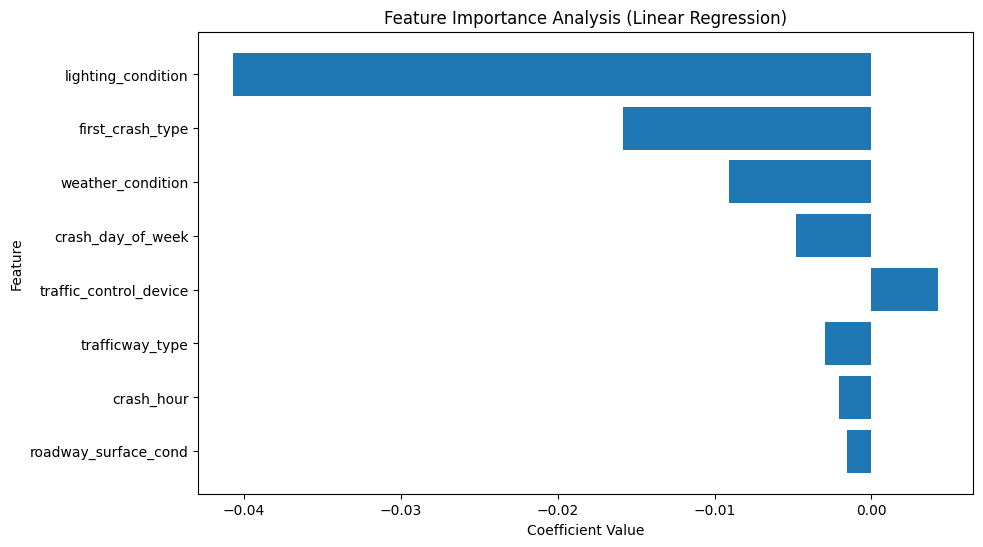

In [ ]:
# Get feature importance from Linear Regression coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Sort by absolute coefficient value
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(
    by='Abs_Coefficient', ascending=False
)

# Display top features
print(feature_importance[['Feature', 'Coefficient']].head(10))

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'][:10],
         feature_importance['Coefficient'][:10])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis (Linear Regression)")
plt.gca().invert_yaxis()
plt.show()

***1. Determine the number of records and attributes in the dataset.***

In [ ]:
df.shape

(209306, 9)

***2. Identify which attributes are categorical and which are numerical.***

In [ ]:
df.dtypes

,0
traffic_control_device,int64
weather_condition,int64
lighting_condition,int64
first_crash_type,int64
trafficway_type,int64
roadway_surface_cond,int64
crash_hour,int64
crash_day_of_week,int64
injuries_total,float64


***3. Check the dataset for missing or null values.***

In [ ]:
df.isnull().sum()

,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
roadway_surface_cond,0
crash_hour,0
crash_day_of_week,0
injuries_total,0


***4. Validate the range and correctness of coded variables such as:traffic_control_device, weather_condition, lighting_condition***

In [ ]:
df['traffic_control_device'].unique()
df['weather_condition'].unique()
df['lighting_condition'].unique()

array([3, 1, 4, 0, 5, 2])

**5. Check crash_hour valid range (0–23)**

In [ ]:
df[(df['crash_hour'] < 0) | (df['crash_hour'] > 23)]

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,crash_hour,crash_day_of_week,injuries_total


**6. Check crash_day_of_week valid range (1–7)**

In [ ]:
invalid_hours = df[(df['crash_hour'] < 0) | (df['crash_hour'] > 23)]
print("Invalid crash_hour rows:", len(invalid_hours))
invalid_hours.head()

Invalid crash_hour rows: 0


,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,crash_hour,crash_day_of_week,injuries_total


**7. Identify duplicate accident records**

In [ ]:
duplicates = df[df.duplicated()]
print("Duplicate rows:", len(duplicates))
duplicates.head()

Duplicate rows: 111405


,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,crash_hour,crash_day_of_week,injuries_total
205,16,2,3,10,2,0,15,6,0.0
268,16,2,3,17,2,0,10,6,0.0
271,16,2,3,10,8,0,14,4,0.0
349,16,2,1,15,8,0,17,2,0.0
397,16,2,3,10,8,0,14,5,0.0


**8. Detect outliers in injuries_total (IQR Method)**

In [ ]:
Q1 = df['injuries_total'].quantile(0.25)
Q3 = df['injuries_total'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['injuries_total'] < Q1 - 1.5*IQR) |
              (df['injuries_total'] > Q3 + 1.5*IQR)]

print("Outliers count:", len(outliers))

Outliers count: 5692


**9. Convert coded categorical variables to labels**

In [ ]:
traffic_map = {1:'Signal', 2:'Stop Sign', 3:'None', 4:'Yield'}
weather_map = {1:'Clear', 2:'Rain', 3:'Snow'}
light_map = {1:'Daylight', 2:'Darkness'}

df['traffic_control_device'] = df['traffic_control_device'].map(traffic_map)
df['weather_condition'] = df['weather_condition'].map(weather_map)
df['lighting_condition'] = df['lighting_condition'].map(light_map)

In [ ]:
df[['traffic_control_device','weather_condition','lighting_condition']].head()

,traffic_control_device,weather_condition,lighting_condition
0,NaN,Rain,NaN
1,NaN,Rain,Daylight
2,NaN,Rain,NaN
3,NaN,Rain,NaN
4,NaN,Rain,NaN


**10. Create time_of_day feature**

In [ ]:
def get_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['crash_hour'].apply(get_time)

In [ ]:
df[['crash_hour','time_of_day']].head(10)

,crash_hour,time_of_day
0,13,Afternoon
1,0,Night
2,10,Morning
3,19,Evening
4,14,Afternoon
5,0,Night
6,11,Morning
7,14,Afternoon
8,18,Evening
9,17,Evening


**11. Create binary injury_occurred**

In [ ]:
df['injury_occurred'] = df['injuries_total'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df[['injuries_total','injury_occurred']].head(10)

,injuries_total,injury_occurred
0,0.0,0
1,0.0,0
2,0.0,0
3,5.0,1
4,0.0,0
5,2.0,1
6,0.0,0
7,1.0,1
8,0.0,0
9,0.0,0


**12. Final cleaning + encoding**

In [ ]:
df = df.drop_duplicates()
df = df.dropna()
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded.shape

(4026, 16)

In [ ]:
df_encoded.head()

,first_crash_type,trafficway_type,roadway_surface_cond,crash_hour,crash_day_of_week,injuries_total,injury_occurred,traffic_control_device_Signal,traffic_control_device_Stop Sign,traffic_control_device_Yield,weather_condition_Rain,weather_condition_Snow,lighting_condition_Daylight,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
15,14,8,0,23,3,1.0,1,False,False,True,True,False,True,False,False,True
128,10,8,0,19,3,0.0,0,False,False,True,True,False,True,True,False,False
130,2,2,0,1,2,0.0,0,False,False,True,True,False,True,False,False,True
190,3,6,5,1,7,0.0,0,False,True,False,True,False,True,False,False,True
239,11,10,6,22,1,0.0,0,False,False,True,False,True,True,False,False,True


**B. Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**13. Traffic control device frequency**

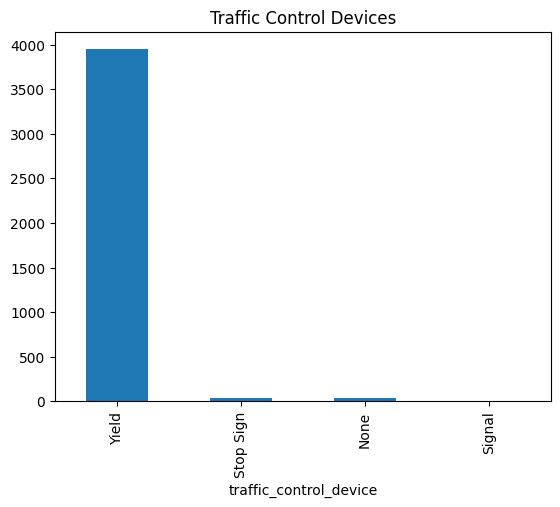

In [ ]:
df['traffic_control_device'].value_counts().plot(kind='bar')
plt.title('Traffic Control Devices')
plt.show()

**14. Weather vs accidents**

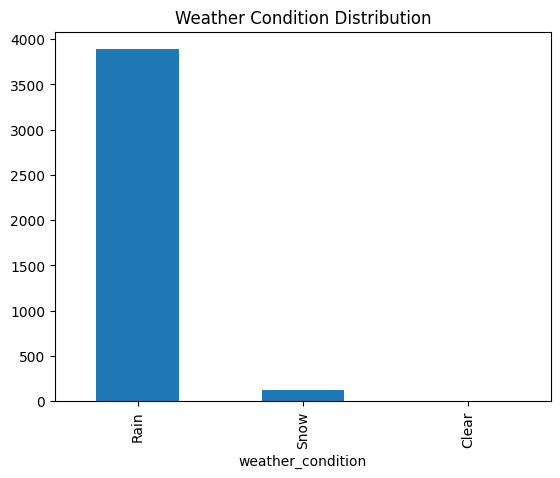

In [ ]:
df['weather_condition'].value_counts().plot(kind='bar')
plt.title('Weather Condition Distribution')
plt.show()

**15. Lighting vs injuries**

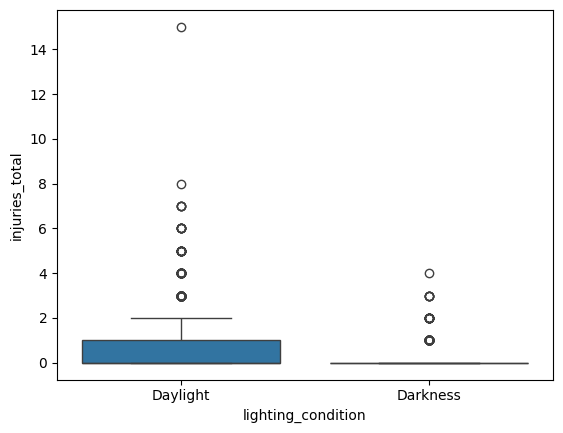

In [ ]:
sns.boxplot(x='lighting_condition', y='injuries_total', data=df)
plt.show()

**16. Most common crash types**

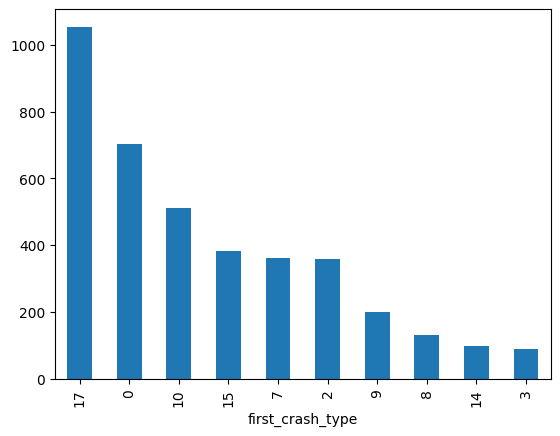

In [ ]:
df['first_crash_type'].value_counts().head(10).plot(kind='bar')
plt.show()

**17. Trafficway type comparison**

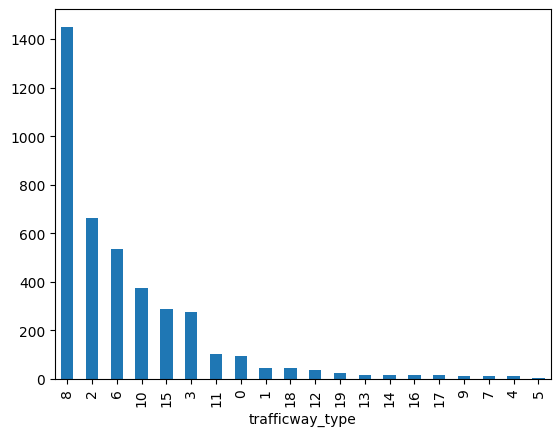

In [ ]:
df['trafficway_type'].value_counts().plot(kind='bar')
plt.show()

**18. Road surface vs injury severity**

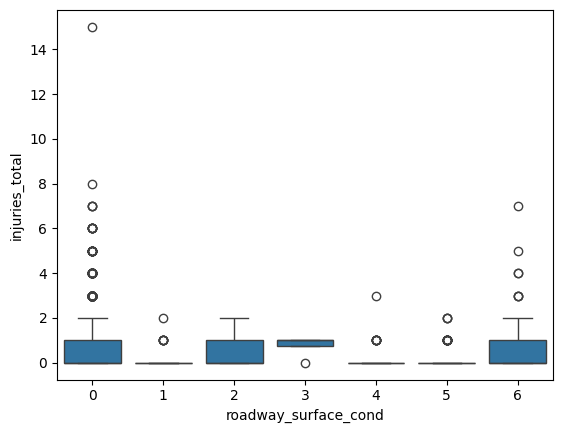

In [ ]:
sns.boxplot(x='roadway_surface_cond', y='injuries_total', data=df)
plt.show()

**19. Crashes by hour**

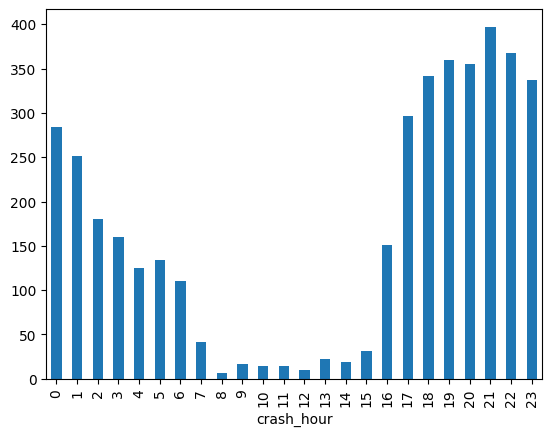

In [ ]:
df['crash_hour'].value_counts().sort_index().plot(kind='bar')
plt.show()

**20. Day with highest accidents**

In [ ]:
print(df['crash_day_of_week'].value_counts().idxmax())


7


**21. Crash hour vs injury count**

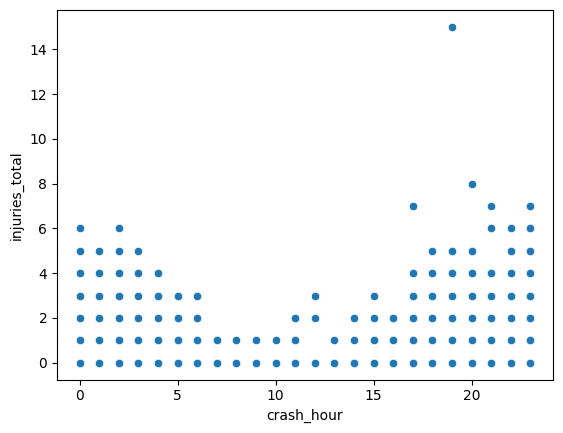

In [ ]:
sns.scatterplot(x='crash_hour', y='injuries_total', data=df)
plt.show()

**22. Avg injuries by weather**

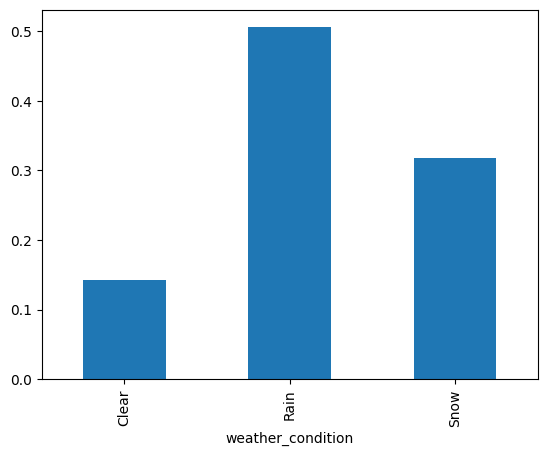

In [ ]:
df.groupby('weather_condition')['injuries_total'].mean().plot(kind='bar')
plt.show()

**23. Poor lighting vs injuries**

In [ ]:
poor_light = df[df['lighting_condition'].isin(['Darkness'])]
print(poor_light['injuries_total'].mean())

0.28604651162790695


**24. Correlation heatmap**

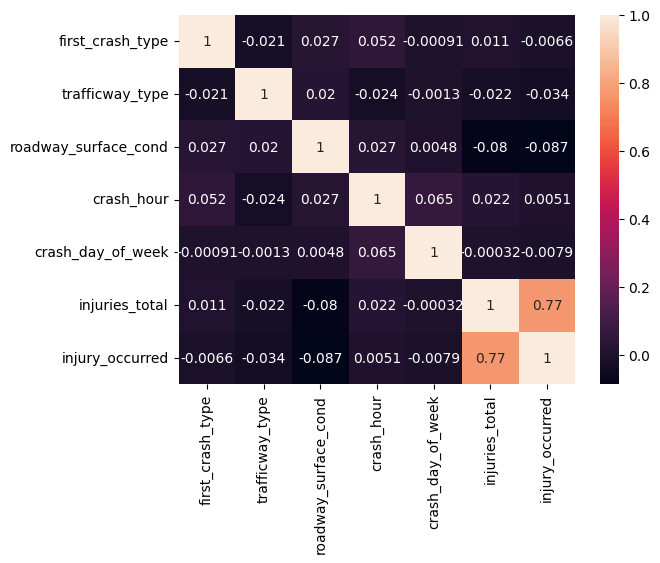

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

**25. Summary auto-insights**

In [ ]:
print("Peak Crash Hour:", df['crash_hour'].value_counts().idxmax())
print("Worst Weather:", df['weather_condition'].value_counts().idxmax())
print("Highest Injury Surface:",
      df.groupby('roadway_surface_cond')['injuries_total'].mean().idxmax())

Peak Crash Hour: 21
Worst Weather: Rain
Highest Injury Surface: 3
